# Decision Tree and Random Forest Classifier Algorithms

**Data is from a public dataset from lending club:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data:

In [2]:
loan_data = pd.read_csv('loan_data.csv')

In [3]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


** Check out the info(), head(), and describe() methods on loans.**

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

**Visualizing the distribution of FICO scores for each Credit Policy class:** 

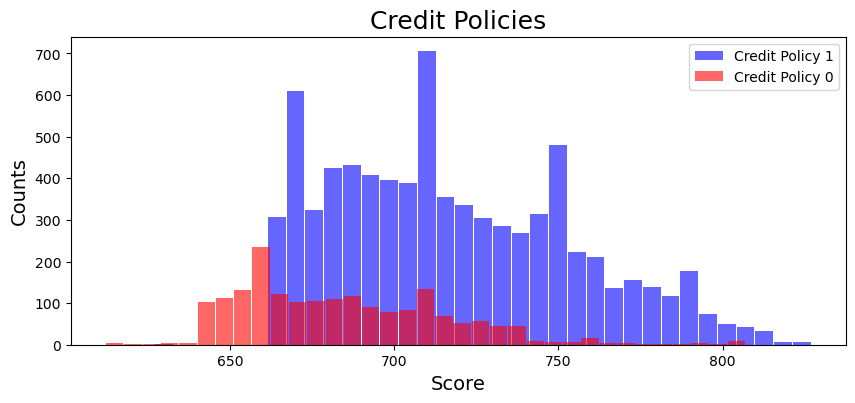

In [6]:
plt.figure(figsize=(10,4))
plt.hist(loan_data[loan_data['credit.policy']==1]['fico'],color = 'blue',bins = 35, rwidth=0.95,alpha = 0.6, label = 'Credit Policy 1')
plt.hist(loan_data[loan_data['credit.policy']==0]['fico'],color = 'red',bins = 35, rwidth=0.95,alpha = 0.6, label = 'Credit Policy 0')

plt.title('Credit Policies',fontsize = 18)
plt.xlabel('Score',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend()
plt.show()

**Visualizing the distribution of FICO scores for each Payment class:**

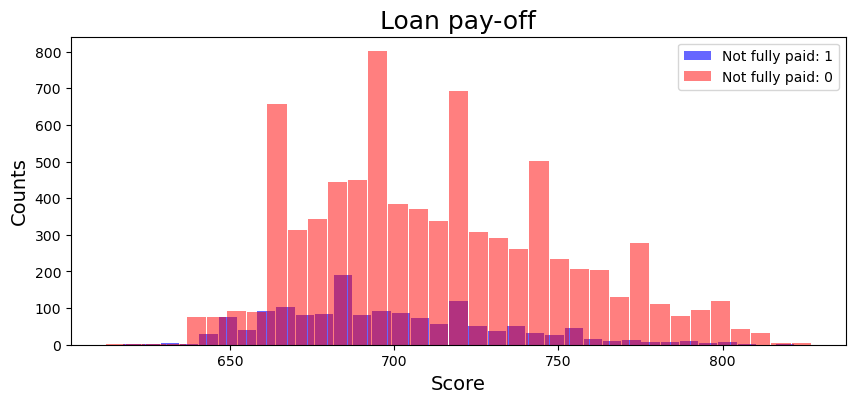

In [7]:
plt.figure(figsize=(10,4))
plt.hist(loan_data[loan_data['not.fully.paid']==1]['fico'],color = 'blue',bins = 35, rwidth=0.95,alpha = 0.6, label = 'Not fully paid: 1')
plt.hist(loan_data[loan_data['not.fully.paid']==0]['fico'],color = 'red',bins = 35, rwidth=0.95,alpha = 0.5, label = 'Not fully paid: 0')

plt.title('Loan pay-off',fontsize = 18)
plt.xlabel('Score',fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.legend()
plt.show()

**Showing the counts of loan purposes based separated by payment class:**

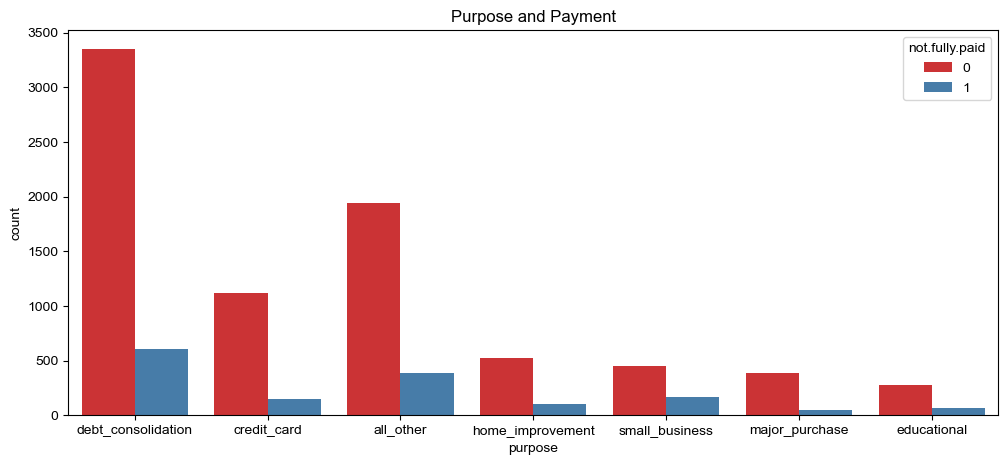

In [8]:
plt.figure(figsize = (12,5))

sns.countplot(data = loan_data, x=  'purpose', hue = 'not.fully.paid', palette = 'Set1')
sns.set_style('darkgrid')
plt.title('Purpose and Payment')
#plt.grid()
plt.show()

**FICO score vs. Interest Rate:**

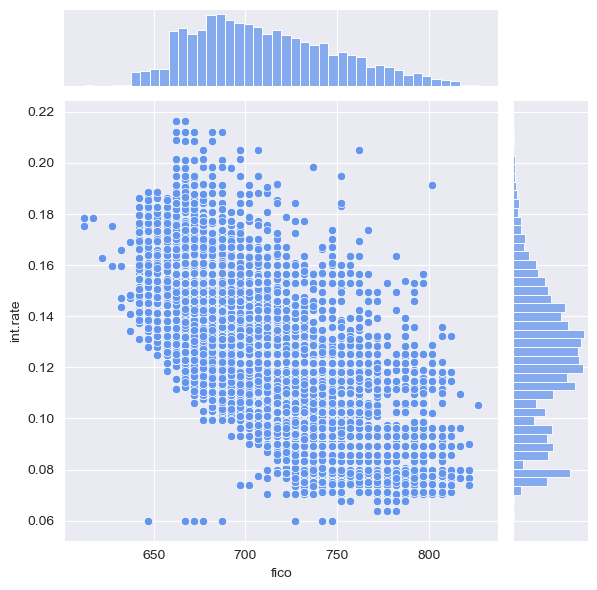

In [9]:
sns.jointplot(x = loan_data['fico'],y=loan_data['int.rate'], color = 'cornflowerblue')
sns.set_style('darkgrid')

**Higher FICO scores tend to result in lower interest rates.**

## Visualizing linear models, separated by the payment class and credit policy:

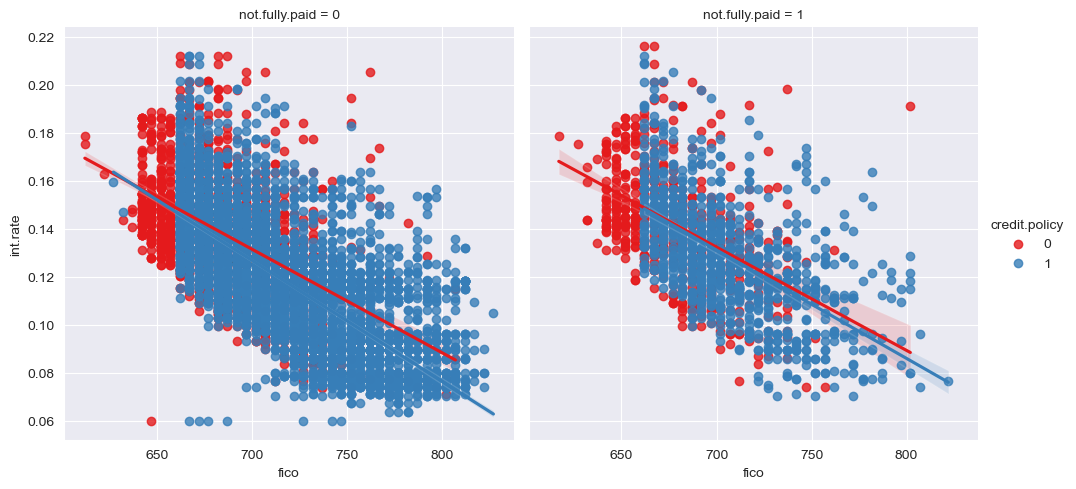

In [10]:
sns.lmplot(data =loan_data,x = 'fico', y = 'int.rate', hue = 'credit.policy', col = 'not.fully.paid',palette = 'Set1')

# Decision Tree algorithm:

In [11]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Creating Categorical Features From the Data:

In [13]:
cat_feats = ['purpose']

**Creating categorical dummy data based on the loan purposes, using pd.gt_dummies(loans,columns=cat_feats,drop_first=True).**

In [14]:
new_data = pd.get_dummies(data = loan_data,columns=cat_feats,drop_first=True)

In [15]:
new_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Splitting the data into training and testing data:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = new_data.drop('not.fully.paid', axis=1)
y = new_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model:

In [18]:
from sklearn.tree import DecisionTreeClassifier

**Fitting the data to the decision tree classifier:**

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predicting and Evaluating the Decision Tree:

In [21]:
prediction = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1988  443]
 [ 343  100]]


## Training a Random Forest model:

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc =RandomForestClassifier(n_estimators=300)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predicting and Evaluating the random forest model:

In [27]:
predictionrfc = rfc.predict(X_test)

In [28]:
print(classification_report(y_test,predictionrfc))
print('\n')
print(confusion_matrix(y_test,predictionrfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.42      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



[[2420   11]
 [ 435    8]]


**Random forests will always report higher precision as they prevent overfitting when compared to decision trees.**